In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import prepare as prep
from wordcloud import WordCloud
import nltk

In [22]:
df = pd.read_json('data2.json')

In [23]:
df

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,image:https://github.com/bitcoinj/bitcoinj/wor...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...
...,...,...,...
255,Bitcoin-com/paperwallet.bitcoin.com,HTML,# Bitcoin.com Paper Wallet\n\nThe Bitcoin.com ...
256,rustyrussell/bitcoin-iterate,C,This is some fast code to iterate over bitcoin...
257,DeFiCh/ain,C++,[![Lint](https://github.com/DeFiCh/ain/actions...
258,gcarq/rusty-blockparser,Rust,# rusty-blockparser\n\n[![Build Status](https:...


In [29]:
df['language']!= 'Python') & (df['language'] != 'JavaScript') & (df['language'] !)

Python              54
JavaScript          35
C++                 26
Java                18
C                   15
PHP                 14
Go                   8
HTML                 8
C#                   8
TypeScript           7
Rust                 6
Jupyter Notebook     6
Shell                5
CSS                  5
Kotlin               3
Ruby                 3
CoffeeScript         2
Dockerfile           2
Dart                 2
Scala                2
Objective-C          2
Markdown             2
AsciiDoc             1
VHDL                 1
Swift                1
Wikitext             1
Haskell              1
Groovy               1
Vue                  1
Nix                  1
Assembly             1
Name: language, dtype: int64

In [5]:
content = prep.clean_text(' '.join(df[df']))
    
content

['bitcoin',
 'core',
 'integrationstaging',
 'tree',
 'httpsbitcoincoreorg',
 'immediately',
 'usable',
 'binary',
 'version',
 'bitcoin',
 'core',
 'software',
 'see',
 'httpsbitcoincoreorgendownload',
 'bitcoin',
 'core',
 'bitcoin',
 'core',
 'connects',
 'bitcoin',
 'peertopeer',
 'network',
 'download',
 'fully',
 'validate',
 'block',
 'transaction',
 'also',
 'includes',
 'wallet',
 'graphical',
 'user',
 'interface',
 'optionally',
 'built',
 'information',
 'bitcoin',
 'core',
 'available',
 'doc',
 'folderdoc',
 'license',
 'bitcoin',
 'core',
 'released',
 'term',
 'mit',
 'license',
 'see',
 'copyingcopying',
 'information',
 'see',
 'httpsopensourceorglicensesmit',
 'development',
 'process',
 'master',
 'branch',
 'regularly',
 'built',
 'see',
 'docbuildmd',
 'instruction',
 'tested',
 'guaranteed',
 'completely',
 'stable',
 'tagshttpsgithubcombitcoinbitcointags',
 'created',
 'regularly',
 'release',
 'branch',
 'indicate',
 'new',
 'official',
 'stable',
 'release',
 

In [8]:
word_count = pd.Series(content).value_counts()
word_count.head()

bitcoin        568
transaction    272
api            219
version        203
install        201
dtype: int64

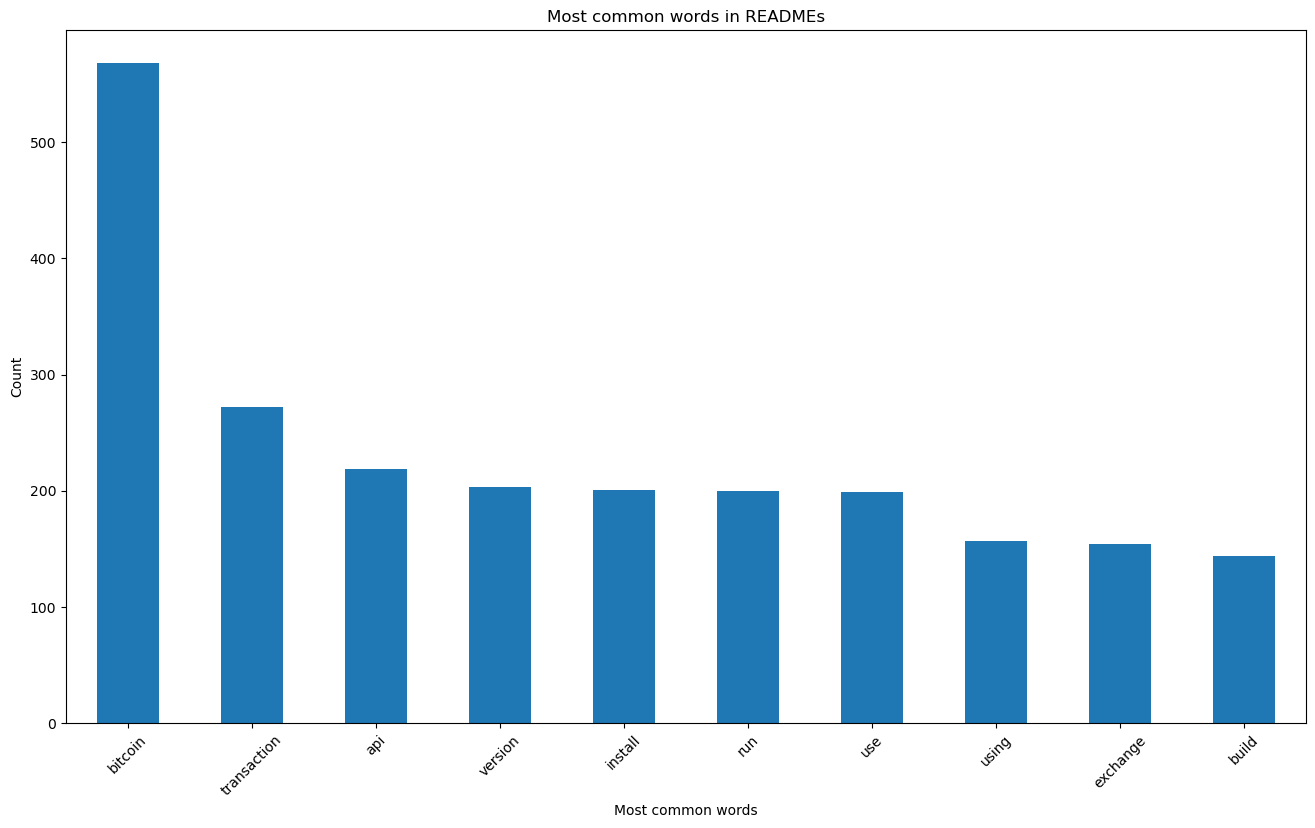

In [10]:
word_count.sort_values(ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words in READMEs')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [15]:
bitcoin_bigrams = pd.Series(nltk.ngrams(word_count.index, 2))
bitcoin_bigrams.head()

0    (bitcoin, transaction)
1        (transaction, api)
2            (api, version)
3        (version, install)
4            (install, run)
dtype: object

In [18]:
top_bitcoin_bigrams = bitcoin_bigrams.value_counts().head(10)
top_bitcoin_bigrams

(bitcoin, transaction)                                                                                          1
(035214357, 2259)                                                                                               1
(tcp1270013456, srcdocsimagessamplejpg)                                                                         1
(srcdocsimagessamplejpg, customize)                                                                             1
(customize, inmemory)                                                                                           1
(inmemory, streaming)                                                                                           1
(streaming, slim)                                                                                               1
(slim, srcdocsimagesiconjpg)                                                                                    1
(srcdocsimagesiconjpg, srchttpsopencollectivecombitcoinkitsponsor9avatarsvga)           